In [1]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

cellDir = r'C:\Users\Roarke\Desktop\University\2019 Semester 2 CURRENT\CITS4404\Project\RCNN\Mask_RCNN\cells' 

Using TensorFlow backend.


In [2]:
# class that defines and loads the cell dataset
class CellDataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        # define one class
        self.add_class("dataset", 1, "cell")
        # define data locations

        # find all images
        if is_train:
            images_dir = dataset_dir + '/cellTrainingData/image_2/'
            annotations_dir = dataset_dir + '/cellTrainingData/image_2_XML/'   
            for filename in listdir(images_dir):
                # extract image id
                image_id = filename[:-4]
                img_path = images_dir + filename
                ann_path = annotations_dir + image_id + '.xml'
                # add to dataset
                self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
            images_dir = dataset_dir + '/cellTrainingData/image_6/'
            annotations_dir = dataset_dir + '/cellTrainingData/image_6_XML/'   
            for filename in listdir(images_dir):
                # extract image id
                image_id = filename[:-4]
                img_path = images_dir + filename
                ann_path = annotations_dir + image_id + '.xml'
                # add to dataset
                self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
            images_dir = dataset_dir + '/cellTrainingData/image_7/'
            annotations_dir = dataset_dir + '/cellTrainingData/image_7_XML/'   
            for filename in listdir(images_dir):
                # extract image id
                image_id = filename[:-4]
                img_path = images_dir + filename
                ann_path = annotations_dir + image_id + '.xml'
                # add to dataset
                self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
            images_dir = dataset_dir + '/cellTrainingData/image_15/'
            annotations_dir = dataset_dir + '/cellTrainingData/image_15_XML/'   
            for filename in listdir(images_dir):
                # extract image id
                image_id = filename[:-4]
                img_path = images_dir + filename
                ann_path = annotations_dir + image_id + '.xml'
                # add to dataset
                self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
            images_dir = dataset_dir + '/cellTrainingData/image_17/'
            annotations_dir = dataset_dir + '/cellTrainingData/image_17_XML/'   
            for filename in listdir(images_dir):
                # extract image id
                image_id = filename[:-4]
                img_path = images_dir + filename
                ann_path = annotations_dir + image_id + '.xml'
                # add to dataset
                self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
        
        if not is_train: 
            images_dir = dataset_dir + '/cellTestData/image_20/'
            annotations_dir = dataset_dir + '/cellTestData/image_20_XML/'
            for filename in listdir(images_dir):
                image_id = filename[:-4]
                img_path = images_dir + filename
                ann_path = annotations_dir + image_id + '.xml'
                # add to dataset
                self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
    
    def load_final(self, dataset_dir):
        self.add_class("dataset", 1, "cell")
        images_dir = dataset_dir + '/image/'
        annotations_dir = dataset_dir + '/annot/'
        for filename in listdir(images_dir):
            image_id = filename[:-4]
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
            # add to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
    
    
    # extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
        # load and parse the file
        tree = ElementTree.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
        # extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height
 
    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        boxes, w, h = self.extract_boxes(path)
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        # create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('cell'))
        return masks, asarray(class_ids, dtype='int32')
 
    # load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']
    
# define a configuration for the model
class CellConfig(Config):
    # define the name of the configuration
    NAME = "cell_cfg"
    # number of classes (background + cell)
    NUM_CLASSES = 1 + 1
    # number of training steps per epoch
    STEPS_PER_EPOCH = 40 #131

In [3]:
# prepare train set
train_set = CellDataset()
train_set.load_dataset(cellDir, is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
# prepare test/val set
test_set = CellDataset()
test_set.load_dataset(cellDir, is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))
# prepare config
config = CellConfig()
#config.display()
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)
# load weights (mscoco) and exclude the output layers
model.load_weights('mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
# train weights (output layers or 'heads')

Train: 80
Test: 16



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


In [4]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=3, layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: ./cell_cfg20191006T1502\mask_rcnn_cell_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDis

c:\users\roarke\miniconda3\envs\maskrcnn\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
c:\users\roarke\miniconda3\envs\maskrcnn\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
c:\users\roarke\miniconda3\envs\maskrcnn\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Epoch 1/3
40/40 [==============================] - 144s 4s/step - loss: 2.6585 - rpn_class_loss: 0.1459 - rpn_bbox_loss: 1.0217 - mrcnn_class_loss: 0.3813 - mrcnn_bbox_loss: 0.7046 - mrcnn_mask_loss: 0.4050 - val_loss: 1.7987 - val_rpn_class_loss: 0.0566 - val_rpn_bbox_loss: 0.4052 - val_mrcnn_class_loss: 0.4146 - val_mrcnn_bbox_loss: 0.5202 - val_mrcnn_mask_loss: 0.4020
Epoch 2/3
40/40 [==============================] - 129s 3s/step - loss: 1.3212 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.2545 - mrcnn_class_loss: 0.2470 - mrcnn_bbox_loss: 0.4110 - mrcnn_mask_loss: 0.3787 - val_loss: 1.5334 - val_rpn_class_loss: 0.0442 - val_rpn_bbox_loss: 0.3286 - val_mrcnn_class_loss: 0.3775 - val_mrcnn_bbox_loss: 0.4091 - val_mrcnn_mask_loss: 0.3740
Epoch 3/3
40/40 [==============================] - 129s 3s/step - loss: 1.1520 - rpn_class_loss: 0.0253 - rpn_bbox_loss: 0.2143 - mrcnn_class_loss: 0.2153 - mrcnn_bbox_loss: 0.3342 - mrcnn_mask_loss: 0.3629 - val_loss: 1.5295 - val_rpn_class_loss: 0.0

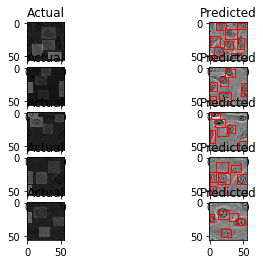

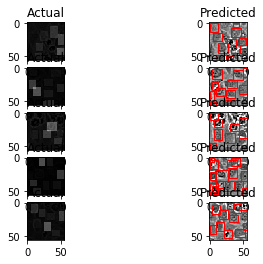

Train mAP: 0.667
Test mAP: 0.659


In [8]:
from numpy import mean
from numpy import expand_dims

from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image

from matplotlib import pyplot
from matplotlib.patches import Rectangle



# define the prediction configuration
class PredictionConfig(Config):
    # define the name of the configuration
    NAME = "cell_cfg"
    # number of classes (background + cell)
    NUM_CLASSES = 1 + 1
    # simplify GPU config
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
# calculate the mAP for a model on a given dataset
def evaluate_model(dataset, model, cfg):
    APs = list()
    for image_id in dataset.image_ids:
        # load image, bounding boxes and masks for the image id
        image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
        # convert pixel values (e.g. center)
        scaled_image = mold_image(image, cfg)
        # convert image into one sample
        sample = expand_dims(scaled_image, 0)
        # make prediction
        yhat = model.detect(sample, verbose=0)
        # extract results for first sample
        r = yhat[0]
        # calculate statistics, including AP
        AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
        # store
        APs.append(AP)
    # calculate the mean AP across all images
    mAP = mean(APs)
    return mAP    
    
# plot a number of photos with ground truth and predictions
def plot_actual_vs_predicted(dataset, model, cfg, n_images=5):
    # load image and mask
    for i in range(n_images):
        # load the image and mask
        image = dataset.load_image(i)
        mask, _ = dataset.load_mask(i)
        # convert pixel values (e.g. center)
        scaled_image = mold_image(image, cfg)
        # convert image into one sample
        sample = expand_dims(scaled_image, 0)
        # make prediction
        yhat = model.detect(sample, verbose=0)[0]
        # define subplot
        pyplot.subplot(n_images, 2, i*2+1)
        # plot raw pixel data
        pyplot.imshow(image)
        pyplot.title('Actual')
        # plot masks
        for j in range(mask.shape[2]):
            pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
        # get the context for drawing boxes
        pyplot.subplot(n_images, 2, i*2+2)
        # plot raw pixel data
        pyplot.imshow(image)
        pyplot.title('Predicted')
        ax = pyplot.gca()
        # plot each box
        for box in yhat['rois']:
            # get coordinates
            y1, x1, y2, x2 = box
            # calculate width and height of the box
            width, height = x2 - x1, y2 - y1
            # create the shape
            rect = Rectangle((x1, y1), width, height, fill=False, color='red')
            # draw the box
            ax.add_patch(rect)
    # show the figure
    pyplot.show()
    
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights
model_path = 'mask_rcnn_cell_cfg_0003.h5'
model.load_weights(model_path, by_name=True)
# plot predictions for train dataset
fig = plot_actual_vs_predicted(train_set, model, cfg)
# plot predictions for test dataset
fig2 = plot_actual_vs_predicted(test_set, model, cfg)

# evaluate model on training dataset
train_mAP = evaluate_model(train_set, model, cfg)
print("Train mAP: %.3f" % train_mAP)
# evaluate model on test dataset
test_mAP = evaluate_model(test_set, model, cfg)
print("Test mAP: %.3f" % test_mAP)

In [9]:
# plot a number of photos with ground truth and predictions
def plot_actual_vs_predicted2(dataset, model, cfg, n_images=4):
    # load image and mask
    for i in range(n_images):
        # load the image and mask
        image = dataset.load_image(i)
        mask, _ = dataset.load_mask(i)
        # convert pixel values (e.g. center)
        scaled_image = mold_image(image, cfg)
        # convert image into one sample
        sample = expand_dims(scaled_image, 0)
        # make prediction
        yhat = model.detect(sample, verbose=0)[0]
        pyplot.subplot(n_images/2, 4, i*2+2)
        # plot raw pixel data
        pyplot.imshow(image)
        pyplot.subplot(n_images/2, 4, i*2+2)
        # plot raw pixel data
        pyplot.imshow(image)
        pyplot.title('Predicted')
        ax = pyplot.gca()
        # plot each box
        for box in yhat['rois']:
            # get coordinates
            y1, x1, y2, x2 = box
            # calculate width and height of the box
            width, height = x2 - x1, y2 - y1
            # create the shape
            rect = Rectangle((x1, y1), width, height, fill=False, color='red')
            # draw the box
            ax.add_patch(rect)
    # show the figure
    pyplot.show()

c:\users\roarke\miniconda3\envs\maskrcnn\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


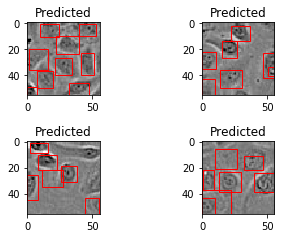

In [10]:
#cellDir2 = r'C:\Users\Roarke\Desktop\University\2019 Semester 2 CURRENT\CITS4404\Project\RCNN\Mask_RCNN\cells\final'
#final_set = CellDataset()
#final_set.load_final(cellDir2)
#final_set.prepare()
fig = plot_actual_vs_predicted2(train_set, model, cfg)

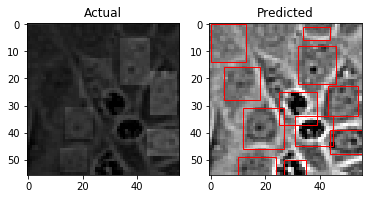

In [14]:
fig = plot_actual_vs_predicted2(test_set, model, cfg)